# Data preprocessing

## Import the required modules

In [2]:
import pandas as pd
import dask.dataframe as dd
import numpy as np
from pathlib import Path

## Load the dataset
1. Load the dataset
2. Convert it into a pandas DataFrame

In [3]:
dataset_raw = dd.read_parquet('dataset/dataset_raw.parquet')

In [4]:
dataset_pd = pd.DataFrame(dataset_raw.compute())

## Defining the target variable
1. Analyzing the citation count distribution
2. Group citations into categories
3. Create ordinal target variable

In [24]:
print("Descriptive statistics:")
print(dataset_pd['citation_count'].describe())
print("")

count_ranges = [(0, 5), (5, 10), (10, 20), (20, 50), (50, 100), (100, 500), (500, 1000), (1000, 5000), (5000, 10000), (10000, 100000)]
for count_range in count_ranges:
    print(f"Number of elements between {count_range[0]} and {count_range[1]}: {len(dataset_pd[(dataset_pd['citation_count'] >= count_range[0]) & (dataset_pd['citation_count'] < count_range[1])])}")

Descriptive statistics:
count    573904.000000
mean         30.975079
std         143.814509
min           0.000000
25%           3.000000
50%          10.000000
75%          28.000000
max       50051.000000
Name: citation_count, dtype: float64

Number of elements between 0 and 5: 185354
Number of elements between 5 and 10: 95357
Number of elements between 10 and 20: 103529
Number of elements between 20 and 50: 110197
Number of elements between 50 and 100: 46671
Number of elements between 100 and 500: 30038
Number of elements between 500 and 1000: 1909
Number of elements between 1000 and 5000: 781
Number of elements between 5000 and 10000: 55
Number of elements between 10000 and 100000: 13


<Axes: title={'center': 'Citation Count Distribution'}, ylabel='Frequency'>

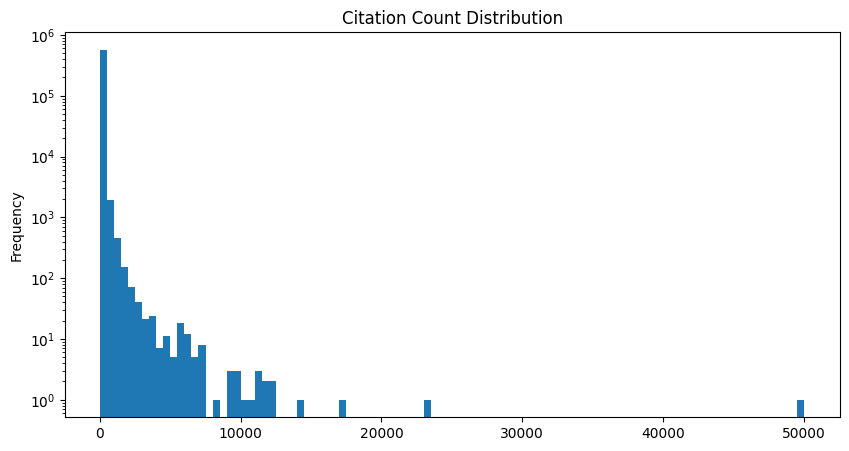

In [20]:
dataset_pd['citation_count'].plot(kind='hist', bins=100, logy=True, figsize=(10, 5), title='Citation Count Distribution')

## Feature Extraction
1. Extracting page count and number of figures
2. Extracting the number of authors
3. 

## Data cleaning

1. Remove duplicates
2. Deal with outliers
3. Deal with missing data
4. ...

## Textual Data processing

1. Tokenization
2. Stopword removal
3. Stemming
4. Lemmatization
5. Vectorization

## Feature Selection and dimensionality reduction
Analyze the data!


## Model training and evaluation

1. Split data into train, val and test set
2. Select appropriate model candidates
3. Train models, evaluate them
4. Select best model
5. Perform hyperparameter tuning